# School Bus Optimization Problem

### Problem Description

A school needs to transport N students to the zoo using buses. There are three types of buses available:

- Buses A, with a capacity of 35 students, costing 300€ each
- Buses B, with a capacity of 49 students, costing 400€ each
- Buses C, with a capacity of 57 students, costing 450€ each

The objective is to minimize the total cost of buses while transporting all students.

### Assumptions

- All students must be transported
- Buses can operate below capacity but at the same cost, regardless of the number of the occupied places
- Occupied seats are an integer number

### Approach

We will compare different scenarios to find the cost-effective solution:

- Trivial solutions: using only buses A, B, C.
- Educated guess starting from a practical hypothesis
- Combining both types of buses for an optimal solution
- Verifying with an iterative solution

### Performance

Each option is implemented in the `BusAllocation` class of th `optimization.core.bus_allocation` module. The `@performance_measure` decorator helps estimating time and memory usage, to be taken into consideration for a scalable solution.

In [1]:
from optimization.core.bus_allocation import BusAllocation

# Define constants
n_students = 6500

seat_a = 35
cost_a = 300

seat_b = 49
cost_b = 400

seat_c = 57
cost_c = 450

bus_allocator = BusAllocation((seat_a, seat_b, seat_c), (cost_a, cost_b, cost_c), n_students)

### Options 1-3: Trivial Solutions

If we use only buses A, B or C, these are the results.

Number of buses A required: {{n_students}}$\frac{{n_students}}{seat_a} = 11.2$. 
We need 12 30-seaters to accomodate all students.

In [2]:
option_1 = bus_allocator.trivial_solution('A')
option_2 = bus_allocator.trivial_solution('B')
option_3 = bus_allocator.trivial_solution('C')

inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  trivial_solution
{'A': 186, 'B': 0, 'C': 0, 'minimum_total_cost': 55800}
We need 186 buses A
We need 0 buses B
We need 0 buses C
Minimum total cost: 55800€
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  trivial_solution
{'A': 0, 'B': 133, 'C': 0, 'minimum_total_cost': 53200}
We need 0 buses A
We need 133 buses B
We need 0 buses C
Minimum total cost: 53200€
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  trivial_solution
{'A': 0, 'B': 0, 'C': 115, 'minimum_total_cost': 51750}
We need 0 buses A
We need 0 buses B
We need 115 buses C
Minimum total cost: 51750€


### Option 4: Educated Guess

We can use aset up a simple optimization algorithm using an iterative approach to determine the fewest buses required for the lowest cost. 
Intuitively, the price of one seat is lower in the 40-seat buses (i.e. 500€ for 40-seats, or 12.5€ per seats) than in the 30-seat buses 
(i.e. 400€ for 30seats, or 13.3€ per seats). 
Thus we will try to fill as many 40-seat buses first and the remaining 30-seaters with the remaining students.

- Number of 30-seat buses: 1
- Number of 40-seat buses: 8
- Total cost: 4400€

In [3]:
option_4 = bus_allocator.educated_guess()

inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  educated_guess
{'A': 1, 'B': 0, 'C': 114, 'minimum_total_cost': 51600}
We need 1 buses A
We need 0 buses B
We need 114 buses C
Minimum total cost: 51600€


In [4]:
option_5 = bus_allocator.linear_programming()

inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  linear_programming
{'A': 2, 'B': 1, 'C': 112, 'minimum_total_cost': 51400.0}
We need 2 buses A
We need 1 buses B
We need 112 buses C
Minimum total cost: 51400.0€


In [5]:
option_6 = bus_allocator.iterative_solution()

inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  wrapper
inside wrapper
wrapping:  iterative_solution
{'A': 1, 'B': 4, 'C': 110, 'minimum_total_cost': 51400}
We need 1 buses A
We need 4 buses B
We need 110 buses C
Minimum total cost: 51400€


In [6]:
option_6

12.442012310028076

TypeError: tuple indices must be integers or slices, not str

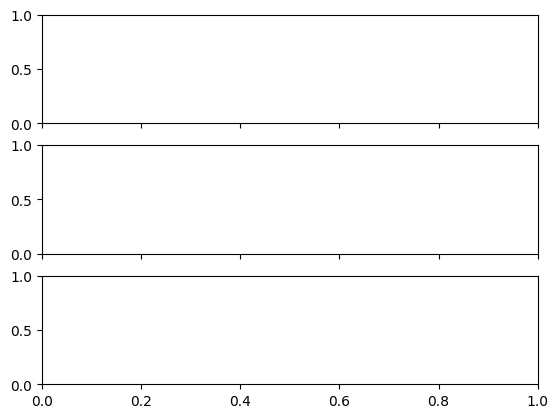

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, sharex=True)

ax[0].plot([ opt['minimum_total_cost'] for opt in 
            [option_1, option_2, option_3, option_4, option_5, option_6] ])
ax[1].plot([ opt['execution_time'] for opt in 
            [option_1, option_2, option_3, option_4, option_5, option_6] ])
ax[2].plot([ opt['memory_usage'] for opt in 
            [option_1, option_2, option_3, option_4, option_5, option_6] ])
